In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg
import warnings
warnings.filterwarnings('ignore')

#### 1. Решите систему линейных уравнений

In [3]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

In [6]:
A1 = np.linalg.inv(A)
#print(A1)
print(f'det =  {np.linalg.det(A):.1f}')
np.dot(A1, B)

det =  60.0


array([-9.2       ,  0.9       ,  6.46666667])

#### 2. Найдите псевдорешение:

In [4]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

##### 3. Сколько решений имеет линейная система:

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-4.05323966e+16,  8.10647933e+16, -4.05323966e+16])

In [13]:
A1 = np.linalg.inv(A)
#print(A1)
print(f'det =  {np.linalg.det(A):.1f}')

det =  0.0


In [14]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A,B.T), axis=1)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 3)

In [15]:
# Оперделитель матрицы равен 0 и ранк исходной и расширенной матрицы не совпадают. 
# Матрица не имеет решения

In [20]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[0, 0, 0]])
C = np.concatenate((A,B.T), axis=1)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 2)

In [22]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([0, 0, 0])
np.linalg.solve(A, B)

array([0., 0., 0.])

#### 4. Вычислите LU-разложение матрицы:

In [26]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)
print(np.dot(P, A) - np.dot(L, U))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
[[ -2. -12. -52.]
 [  3.  26.  70.]
 [ -1. -14. -18.]]


Матрица перестановок P отличается от единичной.

Разложение матрицы как бы перемешано.

In [27]:
np.linalg.matrix_rank(A, 0.0001)

3

In [28]:
print(f'det =  {np.linalg.det(A):.1f}')

det =  432.0


Детерминанта исходной матрицы больше 0 и матрица квадратная. 

Матрица относится к "хорошей"

#### После этого придумайте вектор правых частей и решите полученную линейную систему трех
#### уравнений с данной матрицей.

In [31]:
B = np.array([2, 3, 4])
np.linalg.solve(A, B)

array([ 2.19907407, -0.00231481, -0.06481481])

##### 5. Найдите нормальное псевдорешение недоопределенной системы:
#####  x + 2y – z = 1
#####  8x – 5y + 2z = 12
#####  Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

In [3]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

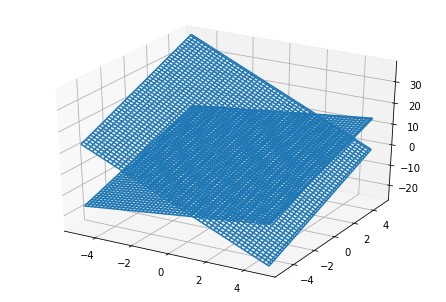

In [7]:
fig = figure()
ax = Axes3D(fig)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(x, y)
z = x + 2 * y - 1
z1 = -4 * x + 2.5 * y +6
ax.plot_wireframe(x, y, z)
ax.plot_wireframe(x, y, z1)
plt.show()

In [8]:
A = np.array([[1, 2, -1],[8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

#### 6. Найдите одно из псевдорешений вырожденной системы:
#### Попробуйте также отыскать и нормальное псевдорешение.

In [9]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
print(A)
print(np.dot(Q, R)) #Проверка разложения QR
print(np.dot(np.transpose(Q), Q)) #Проверка того что матрица ортогональна

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[ 1.00000000e+00 -5.55111512e-16 -2.77555756e-16]
 [-5.55111512e-16  1.00000000e+00  5.68989300e-16]
 [-2.77555756e-16  5.68989300e-16  1.00000000e+00]]


In [10]:
R1 = R[:2, :2]
B1 = np.dot(np.transpose(Q), B)[:2]
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.32822279e-15])

In [11]:
X = np.append(X1, 0)  # Псевдорешение
print(X)
np.linalg.norm(X)   # Норма

[1.50000000e+00 9.32822279e-15 0.00000000e+00]


1.4999999999999896

In [12]:
np.linalg.norm(np.dot(A, X) - B)  # Невязка

1.2247448713915894